# Capstone Project
## Image classifier for the SVHN dataset
### Instructions

In this notebook, you will create a neural network that classifies real-world images digits. You will use concepts from throughout this course in building, training, testing, validating and saving your Tensorflow classifier model.

This project is peer-assessed. Within this notebook you will find instructions in each section for how to complete the project. Pay close attention to the instructions as the peer review will be carried out according to a grading rubric that checks key parts of the project instructions. Feel free to add extra cells into the notebook as required.

### How to submit

When you have completed the Capstone project notebook, you will submit a pdf of the notebook for peer review. First ensure that the notebook has been fully executed from beginning to end, and all of the cell outputs are visible. This is important, as the grading rubric depends on the reviewer being able to view the outputs of your notebook. Save the notebook as a pdf (File -> Download as -> PDF via LaTeX). You should then submit this pdf for review.

### Let's get started!

We'll start by running some imports, and loading the dataset. For this project you are free to make further imports throughout the notebook as you wish. 

### Personal Information
------------------------------------------------------
#### Student: Holger Espinola Rivera
#### Country: Brazil
#### Date: 24/11/2020

In [2]:
import tensorflow as tf
from scipy.io import loadmat

![SVHN overview image](data/svhn_examples.jpg)
For the capstone project, you will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

Your goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [3]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')

Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test dictionaries loaded for you.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel. _Hint: retain the channel dimension, which will now have size 1._
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [4]:
#import essentially packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Task 1.1
--------------
Extract the training and test images and labels separately
from the train and test dictionaries loaded for you

In [5]:
def hsvn_preprocess(train, test):
    x_train = np.array(train['X'])
    x_train = np.moveaxis(x_train, -1, 0)
    x_train = x_train/255.
    y_train = train['y']
    x_test = np.array(test['X'])
    x_test = np.moveaxis(x_test, -1, 0)
    x_test = x_test/255.
    y_test = test['y']
    return x_train, y_train, x_test, y_test

In [6]:
#execute task 1.1
x_train, y_train, x_test, y_test = hsvn_preprocess(train, test)
print('Dimension x_train: ', x_train.shape)
print('Dimension y_train: ', y_train.shape)
print('Dimension x_test: ', x_test.shape)
print('Dimension y_test', y_test.shape)

Dimension x_train:  (73257, 32, 32, 3)
Dimension y_train:  (73257, 1)
Dimension x_test:  (26032, 32, 32, 3)
Dimension y_test (26032, 1)


### Task 1.2  
--------------
Select a random sample of images and corresponding labels 
from the dataset (at least 10) and display them in a figure

In [6]:
def display_images(x, y, quantity):
    if quantity >= 10:
        random_idx = np.random.choice(x.shape[0], quantity)
        fig = plt.figure(figsize = (20, 8))
        for idx in range(10):
            index = random_idx[idx]
            ax = fig.add_subplot(2, quantity/2, idx+1, xticks = [], yticks = [])
            img = np.squeeze(x[index, ...])
            ax.imshow(img)
            ax.set_title(str(y[index, ...]), color = 'green')
        plt.show()
    else:
        print('Display least 10 images')

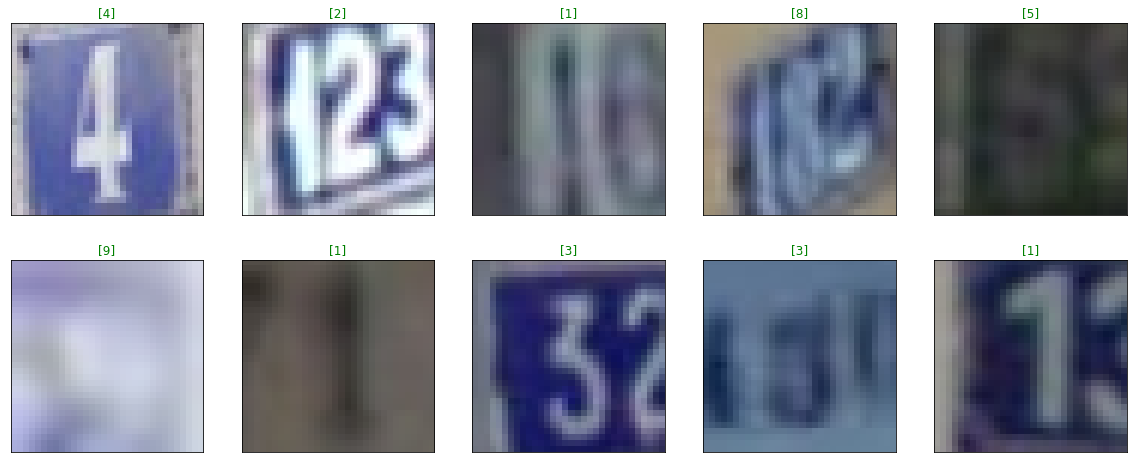

In [7]:
#execute task 1.2 ==> display train images
display_images(x_train, y_train, quantity = 10)

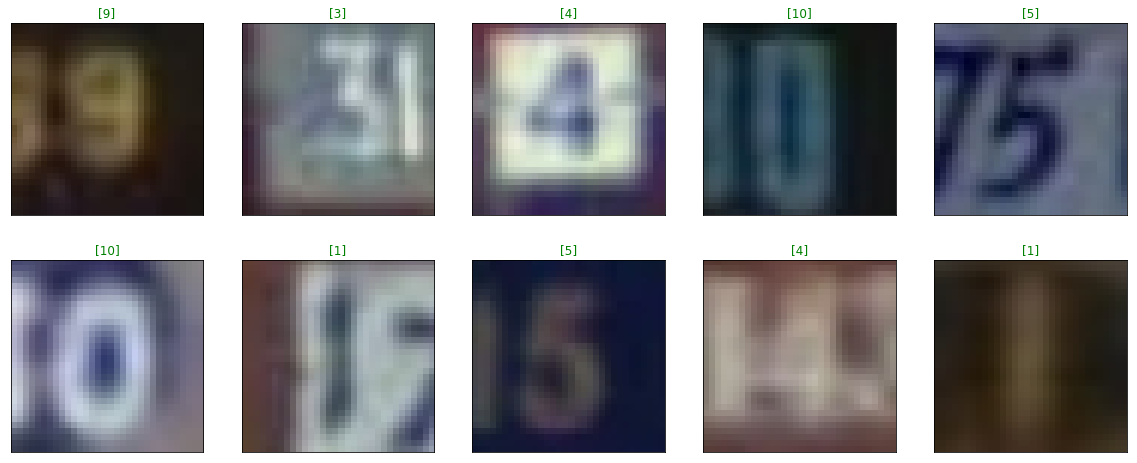

In [8]:
#execute task 1.2 ==> display test images
display_images(x_test, y_test, quantity = 10)

### Task 1.3
-------------
Convert the training and test images to grayscale by taking the average 
across all colour channels for each pixel.  
Hint: retain the channel dimension, which will now have size 1

In [7]:
#RGB shape of images
print('RGB-Dimension x_train: ', x_train.shape)
print('RGB-Dimension x_test: ', x_test.shape)

RGB-Dimension x_train:  (73257, 32, 32, 3)
RGB-Dimension x_test:  (26032, 32, 32, 3)


In [8]:
#if keepdims = true, retains reduced dimensions with length 1
def convert_grayscale(images):
    img = tf.convert_to_tensor(images)         
    img_gray = tf.reduce_mean(img, axis = 3, keepdims = True)  
    img_gray.numpy()
    return img_gray

In [9]:
#execute task 1.3 ==> convert x_train
xgray_train = convert_grayscale(x_train)
print('Grayscale-Dimension x_train: ', xgray_train.shape)

Grayscale-Dimension x_train:  (73257, 32, 32, 1)


In [10]:
#execute task 1.3 ==> convert x_test
xgray_test = convert_grayscale(x_test)
print('Grayscale-Dimension x_test: ', xgray_test.shape)

Grayscale-Dimension x_test:  (26032, 32, 32, 1)


### Task 1.4
---------------
Select a random sample of grayscale images and corresponding labels from the dataset
(at least 10), and display them in a figure

In [13]:
import matplotlib

def display_gray_images(x, y, quantity):
    if quantity >= 10:
        random_idx = np.random.choice(x.shape[0], quantity)
        fig = plt.figure(figsize = (20, 8))
        for idx in range(10):
            index = random_idx[idx]
            ax = fig.add_subplot(2, quantity/2, idx+1, xticks = [], yticks = [])
            img = np.squeeze(x[index, ...])
            ax.imshow(img, cmap = matplotlib.cm.gray)
            ax.set_title(str(y[index, ...]), color = 'green')
        plt.show()
    else:
        print('Display least 10 images')

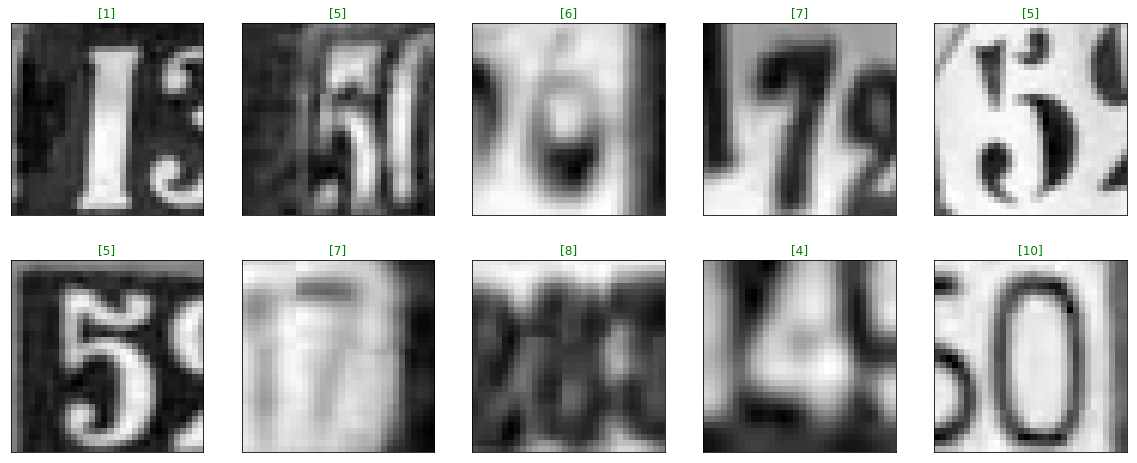

In [14]:
#execute task 1.4 ==> display train images
display_gray_images(xgray_train, y_train, quantity = 10)

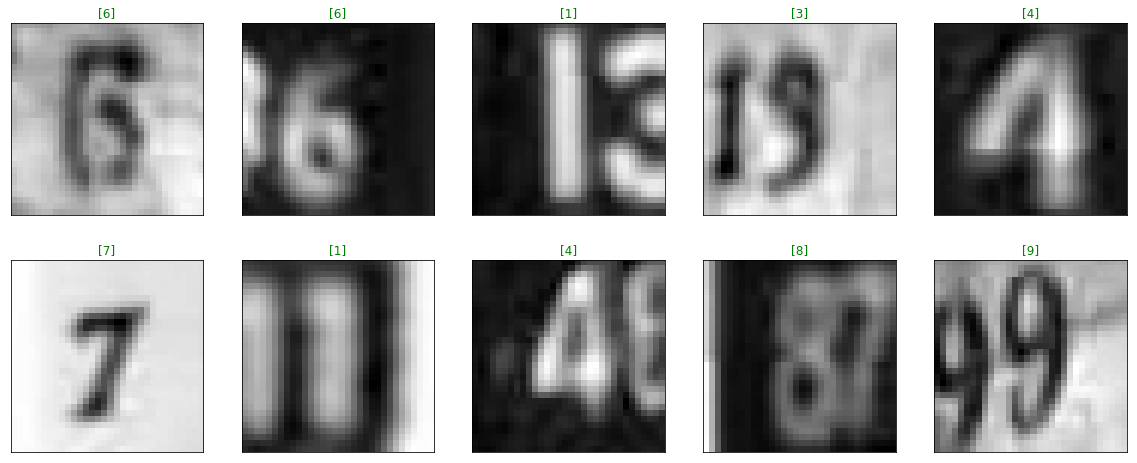

In [15]:
#execute task 1.4 ==> display test images
display_gray_images(xgray_test, y_test, quantity = 10)

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. Your model should use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 4 or 5 layers._
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* As a guide, you should aim to achieve a final categorical cross entropy training loss of less than 1.0 (the validation loss might be higher).
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [11]:
#import essentially packages
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import initializers, regularizers

### Task 2.1
-----------------
* Build an MLP classifier model using Sequential API. Your model should be use only Flatten and Dense 
layers, with the final layer having a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different MLP architectures

In [12]:
def build_model(d1, d2):
    model = Sequential([
        Flatten(input_shape = (d1, d2), name = 'flatten_1'),        
        Dense(units = 512, activation = 'relu', name = 'fc_1',
                 kernel_initializer = initializers.he_uniform(seed = None), 
                 bias_initializer = initializers.Ones()), 
        Dense(units = 256, activation = 'relu', name = 'fc_2'), 
        Dense(units = 64, activation = 'relu', name = 'fc_3'), 
        Dense(units = 10, activation = 'softmax', name = 'fc_4') 
    ])
    
    #Compile model
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-3), 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    return model

### Task 2.2
-------------------
Print out the model summary 

In [23]:
model = build_model(32, 32)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
fc_1 (Dense)                 (None, 512)               524800    
_________________________________________________________________
fc_2 (Dense)                 (None, 256)               131328    
_________________________________________________________________
fc_3 (Dense)                 (None, 64)                16448     
_________________________________________________________________
fc_4 (Dense)                 (None, 10)                650       
Total params: 673,226
Trainable params: 673,226
Non-trainable params: 0
_________________________________________________________________


### Task 2.3
----------------------
* Compile and train the model (we recommend a maximum of 30 epochs), making 
use of both training and validation sets during a training run
* Your model should track at least one appropiate metric, and use at least 
two callbacks during training, one of which should be ModelCheckpoint 
callback
* As a guide, you should aim to achieve a final categorical cross entropy 
training loss of less than 1.0

In [19]:
#adapt outputs to apply categorical_crossentropy loss
from sklearn.preprocessing import LabelBinarizer
def encoding_outputs(y_train, y_test):
    lb = LabelBinarizer()
    y_train = lb.fit_transform(y_train)
    y_test = lb.fit_transform(y_test)
    return y_train, y_test

In [20]:
#define 10 binary-labels by class
y_train, y_test = encoding_outputs(y_train, y_test)
print('Dimensions y-train: ', y_train.shape)
print('Dimensions y-test: ', y_test.shape)

Dimensions y-train:  (73257, 10)
Dimensions y-test:  (26032, 10)


In [26]:
#import packages
from tensorflow.keras.callbacks \
        import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [30]:
#function to reduce plateau
def reduce_plateau_callback():
    reduce_plateau = ReduceLROnPlateau(
                        monitor = 'val_loss', 
                        factor = 0.1, 
                        patience = 3, 
                        verbose = 1, 
                        mode = 'min', 
                        min_lr = 0)
    return reduce_plateau


In [31]:
#function to early stopping
def early_stopping_callback():
    early_stopping = EarlyStopping(
                        monitor = 'val_accuracy', 
                        patience = 8, 
                        min_delta = 0.005, 
                        verbose = 1,
                        mode = 'max')
    return early_stopping


In [32]:
#function to save best model
def save_best_checkpoint():
    checkpoint_path = 'mlp_model_run/checkpoint'
    checkpoint = ModelCheckpoint(
                    filepath = checkpoint_path, 
                    monitor = 'val_accuracy',
                    save_weights_only = True, 
                    save_best_only = True, 
                    verbose = 1, 
                    mode = 'max')
    return checkpoint


In [33]:
#create callbacks
reduce_plateau = reduce_plateau_callback()
early_stopping = early_stopping_callback()
best_checkpoint = save_best_checkpoint()

In [34]:
#define all callbacks
lst_callbacks = [reduce_plateau, early_stopping, best_checkpoint]

In [35]:
#correct dimension to train
xgray_train[:, :, :, -1].shape

TensorShape([73257, 32, 32])

In [36]:
#Train the mlp model with callbacks
hist_train = model.fit(xgray_train[:, :, :, -1], y_train, epochs = 30, 
                        batch_size = 100, validation_split = 0.2, 
                        callbacks = lst_callbacks)

Train on 58605 samples, validate on 14652 samples
Epoch 1/30
58500/58605 [============================>.] - ETA: 0s - loss: 2.0793 - accuracy: 0.2557
Epoch 00001: val_accuracy improved from -inf to 0.42588, saving model to mlp_model_run/checkpoint
58605/58605 [==============================] - 36s 610us/sample - loss: 2.0783 - accuracy: 0.2561 - val_loss: 1.6845 - val_accuracy: 0.4259
Epoch 2/30
58600/58605 [============================>.] - ETA: 0s - loss: 1.4278 - accuracy: 0.5169
Epoch 00002: val_accuracy improved from 0.42588 to 0.54655, saving model to mlp_model_run/checkpoint
58605/58605 [==============================] - 33s 565us/sample - loss: 1.4277 - accuracy: 0.5169 - val_loss: 1.3665 - val_accuracy: 0.5465
Epoch 3/30
58400/58605 [============================>.] - ETA: 0s - loss: 1.1520 - accuracy: 0.6318
Epoch 00003: val_accuracy did not improve from 0.54655
58605/58605 [==============================] - 32s 548us/sample - loss: 1.1517 - accuracy: 0.6318 - val_loss: 1.4640

### Task 2.4
------------------
Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets


In [38]:
#define function to plot learning curves
def plot_learn_curve(hist, metric, title, pos):
    plt.plot(hist.history[metric])
    plt.plot(hist.history['val_'+metric])
    plt.title(title)
    plt.xlabel('epochs')
    plt.ylabel(metric)
    plt.legend(['Training', 'Validation'], loc = pos+' right')
    plt.show()
    

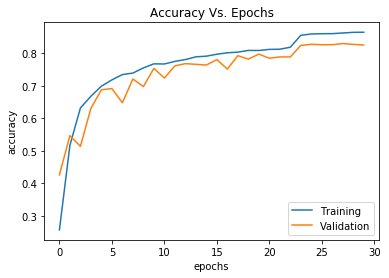

In [39]:
#plot accuracy vs epoch curve
plot_learn_curve(hist_train, 'accuracy', 'Accuracy Vs. Epochs', 'lower')

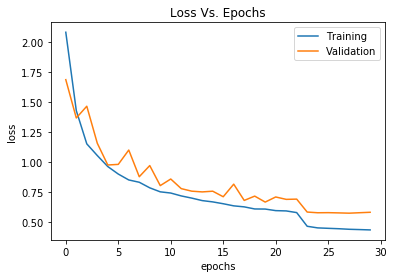

In [40]:
#plot loss vs epoch curve
plot_learn_curve(hist_train, 'loss', 'Loss Vs. Epochs', 'upper')

### Task 2.5
--------------------
Compute and display the loss and accuracy of the trained model on the test set

In [60]:
#function to compute test accuracy 
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
    print('Test-Accuracy: ', round(100 * test_accuracy, 5), '%')
    print('Test-Loss: ', round(test_loss, 6))

In [61]:
#function to load weights of best model
def get_best_model(model):
    checkpoint_best_epoch = tf.train.latest_checkpoint(
                                checkpoint_dir = 'mlp_model_run', 
                                latest_filename = None)
    model.load_weights(checkpoint_best_epoch)
    return model

In [62]:
#load best model
best_mlp = get_best_model(build_model(32, 32))


In [63]:
#display accuracy and loss in test_set
print('Model with best accuracy: ')
get_test_accuracy(best_mlp, xgray_test[:, :, :, -1], y_test)


Model with best accuracy: 
Test-Accuracy:  80.29733 %
Test-Loss:  0.70351


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. Your model should use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer should again have a 10-way softmax output. 
* You should design and build the model yourself. Feel free to experiment with different CNN architectures. _Hint: to achieve a reasonable accuracy you won't need to use more than 2 or 3 convolutional layers and 2 fully connected layers.)_
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run.
* Your model should track at least one appropriate metric, and use at least two callbacks during training, one of which should be a ModelCheckpoint callback.
* You should aim to beat the MLP model performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers \
        import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

### Task 3.1
------------------
* Build CNN classifier and compile model. 
* The CNN model should use fewer trainable parameters than your MLP model

In [14]:
#build CNN architecture

def build_cnn_model(input_shape):
    model = Sequential([
        Conv2D(filters = 16, kernel_size = (3, 3), name = 'conv_1', 
               padding = 'same', activation = 'relu', 
               input_shape = input_shape), 
        BatchNormalization(name = 'bn_1'),
        MaxPool2D(pool_size = (2, 2), name = 'pool_1'), 
        Conv2D(filters = 32, kernel_size = (3, 3), name = 'conv_2', 
               padding = 'same', activation = 'relu'), 
        BatchNormalization(name = 'bn_2'), 
        MaxPool2D(pool_size = (2, 2), name = 'pool_2'), 
        Flatten(name = 'flatten_1'), 
        Dense(units = 256, activation = 'relu', name = 'fc_1'), 
        BatchNormalization(name = 'bn_3'),
        Dense(units = 10, activation = 'softmax', name = 'f_2')
    ])
    
    #Compile model
    model.compile(optimizer = tf.keras.optimizers.Adam(lr = 1e-3), 
                  loss = 'categorical_crossentropy', 
                  metrics = ['accuracy'])
    
    return model


In [12]:
#correct dimensions to CNN
x_train.shape[1:]

(32, 32, 3)

In [49]:
cnn_model = build_cnn_model(input_shape = x_train.shape[1:])
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 32, 32, 16)        64        
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 16, 16, 16)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 16, 16, 32)        4640      
_________________________________________________________________
bn_2 (BatchNormalization)    (None, 16, 16, 32)        128       
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

### Task 3.2 
---------------------
* Train the model (maximum of 30 epochs), making use of both training and validation
sets during the training run
* Your model should track at least one appropiate metric, and use at least two callbacks
during training, one of which should be a ModelCheckpoint callback

In [50]:
#check x_train, y_train and x_test, y_test dimensions
print('x_train dimension: ', x_train.shape)
print('y_train dimension: ', y_train.shape)
print('x_test dimension: ', x_test.shape)
print('y_test dimension: ', y_test.shape)


x_train dimension:  (73257, 32, 32, 3)
y_train dimension:  (73257, 10)
x_test dimension:  (26032, 32, 32, 3)
y_test dimension:  (26032, 10)


In [51]:
#import packages
from tensorflow.keras.callbacks \
        import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [52]:
#function to reduce plateau
def reduce_plateau_cnncallback():
    reduce_plateau = ReduceLROnPlateau(
                        monitor = 'val_loss', 
                        factor = 0.1, 
                        patience = 3, 
                        verbose = 1, 
                        mode = 'min', 
                        min_lr = 0)
    return reduce_plateau

#function to early stopping
def early_stopping_cnncallback():
    early_stopping = EarlyStopping(
                        monitor = 'val_accuracy', 
                        patience = 8, 
                        min_delta = 0.005, 
                        verbose = 1,
                        mode = 'max')
    return early_stopping

#function to save best model
def save_best_cnncheckpoint():
    checkpoint_path = 'cnn_model1_run/checkpoint'
    checkpoint = ModelCheckpoint(
                    filepath = checkpoint_path, 
                    monitor = 'val_accuracy',
                    save_weights_only = True, 
                    save_best_only = True, 
                    verbose = 1, 
                    mode = 'max')
    return checkpoint


In [53]:
#create callbacks
cnn_reduce_plateau = reduce_plateau_cnncallback()
cnn_early_stopping = early_stopping_cnncallback()
cnn_save_best = save_best_cnncheckpoint()

In [54]:
#define callbacks
cnn_callbacks = [cnn_reduce_plateau, cnn_early_stopping, cnn_save_best]


In [55]:
#train cnn model
cnn_history = cnn_model.fit(x_train, y_train, epochs = 30, 
                             validation_split = 0.2,
                             batch_size = 100, 
                             callbacks = cnn_callbacks)

Train on 58605 samples, validate on 14652 samples
Epoch 1/30
58600/58605 [============================>.] - ETA: 0s - loss: 0.6886 - accuracy: 0.7874
Epoch 00001: val_accuracy improved from -inf to 0.83286, saving model to cnn_model1_run/checkpoint
58605/58605 [==============================] - 335s 6ms/sample - loss: 0.6887 - accuracy: 0.7874 - val_loss: 0.5613 - val_accuracy: 0.8329
Epoch 2/30
58600/58605 [============================>.] - ETA: 0s - loss: 0.4302 - accuracy: 0.8703
Epoch 00002: val_accuracy improved from 0.83286 to 0.84023, saving model to cnn_model1_run/checkpoint
58605/58605 [==============================] - 313s 5ms/sample - loss: 0.4302 - accuracy: 0.8702 - val_loss: 0.5281 - val_accuracy: 0.8402
Epoch 3/30
58600/58605 [============================>.] - ETA: 0s - loss: 0.3278 - accuracy: 0.9017
Epoch 00003: val_accuracy improved from 0.84023 to 0.87613, saving model to cnn_model1_run/checkpoint
58605/58605 [==============================] - 333s 6ms/sample - loss

### Task 3.3 
---------------------
* You should aim beat the MLP performance with fewer parameters!
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets

In [56]:
#define function to plot learning curves
def plot_learn_curve(hist, metric, title, pos):
    plt.plot(hist.history[metric])
    plt.plot(hist.history['val_'+metric])
    plt.title(title)
    plt.xlabel('epochs')
    plt.ylabel(metric)
    plt.legend(['Training', 'Validation'], loc = pos+' right')
    plt.show()

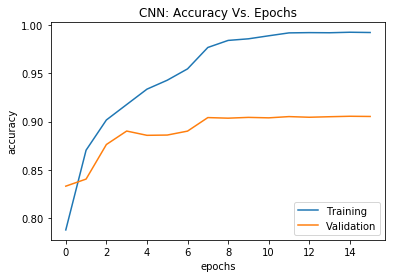

In [57]:
#plot accuracy vs epoch curve
plot_learn_curve(cnn_history, 'accuracy', 
                     'CNN: Accuracy Vs. Epochs', 'lower')

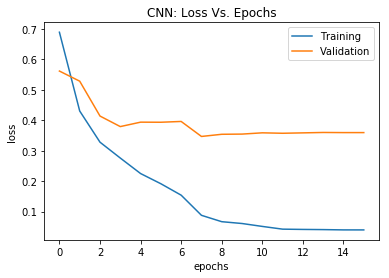

In [58]:
#plot loss vs epoch curve
plot_learn_curve(cnn_history, 'loss', 'CNN: Loss Vs. Epochs', 'upper')

### Task 3.4
--------------------
* Compute and display the loss and accuracy of the trained model on test set

In [21]:
#function to compute test accuracy 
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose = 0)
    print('Test-Accuracy: ', round(100 * test_accuracy, 5), '%')
    print('Test-Loss: ', round(test_loss, 6))

In [22]:
#function to load weights of best model
def get_best_cnnmodel(model):
    checkpoint_best_epoch = tf.train.latest_checkpoint(
                                checkpoint_dir = 'cnn_model1_run', 
                                latest_filename = None)
    model.load_weights(checkpoint_best_epoch)
    return model

In [23]:
#load best model
best_cnn = get_best_cnnmodel(build_cnn_model(input_shape = x_train.shape[1:]))


In [24]:
#display accuracy and loss in test_set
print('Model with best accuracy: ')
get_test_accuracy(best_cnn, x_test, y_test)


Model with best accuracy: 
Test-Accuracy:  88.9559 %
Test-Loss:  0.423858


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that you saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [50]:
#plot bar chart with final predictions

def bar_chart_predictions(model, x_test, y_test):
    num_test_images = y_test.shape[0]
    rand_idx = np.random.choice(num_test_images, 5)
    rand_xtest = x_test[rand_idx, ...]
    rand_ytest = y_test[rand_idx, ...]
    predictions = model.predict(rand_xtest)
    fig, axes = plt.subplots(5, 2, figsize = (16, 12))
    fig.subplots_adjust(hspace = 0.4, wspace = -0.2)

    for i, (prediction, image, label) in enumerate(zip(predictions, rand_xtest, rand_ytest)):
        axes[i, 0].imshow(np.squeeze(image))
        axes[i, 0].get_xaxis().set_visible(False)
        axes[i, 0].get_yaxis().set_visible(False)
        axes[i, 1].bar(np.arange(start = 1, stop = len(prediction)+1), prediction)
        axes[i, 1].set_xticks(np.arange(len(prediction)+1))
        axes[i, 1].set_title(f'Categorical distribution ==> Model prediction: {np.argmax(prediction)+1}')
    plt.show()

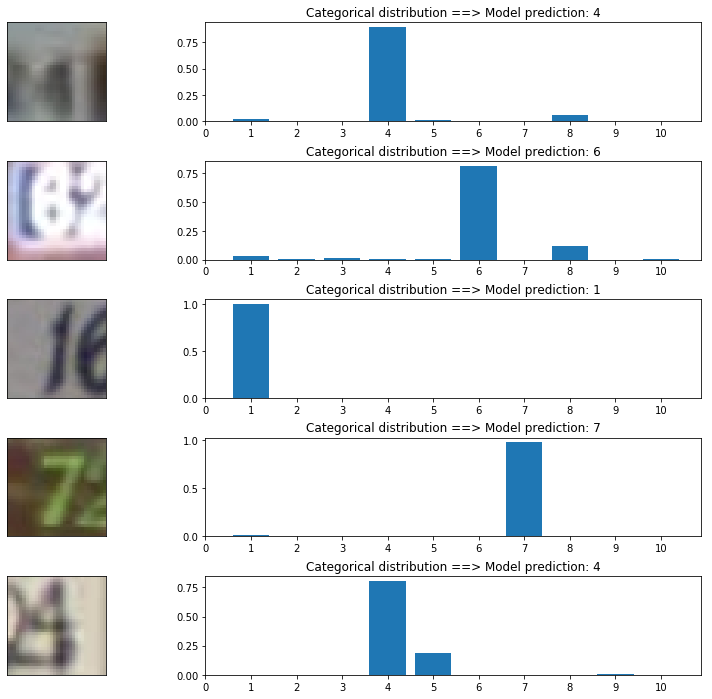

In [59]:
#print predicitions of CNN
bar_chart_predictions(best_cnn, x_test, y_test)

Conclusions
--------------------

### CNN Results

| Metrics | train | validation | test |
| --- | --- | --- | --- |
| accuracy | 99.28% | 90.55% | 88.95% | 
| loss | 0.0400 | 0.3593 | 0.4238 | 

### MLP Results

| Metrics | train | validation | test |
| --- | --- | --- | --- |
| accuracy | 86.29% | 83.03% | 80.29% | 
| loss | 0.4424 | 0.5761 | 0.7035 | 